# Pruebas
## *by Euge*

In [227]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt

Levantamos el *dataset*

In [228]:
df = pd.read_csv('train.csv')

In [229]:
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


Vemos el tipo de cada columna

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16947 non-null  int64  
 1   Region                              16947 non-null  object 
 2   Territory                           16947 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64  
 7   Submitted_for_Approval              16947 non-null  int64  
 8   Bureaucratic_Code                   16947 non-null  object 
 9   Account_Created_Date                16947 non-null  object 
 10  Source                              16947 non-null  object 
 11  Billing_Country                     16947

Veamos si los ID son únicos, así los podemos usar como clave

In [231]:
df['ID'].value_counts().head()

6141     1
27384    1
21263    1
19212    1
25353    1
Name: ID, dtype: int64

Son únicos porque el mayor es 1. Así que van como clave:

In [232]:
df = df.set_index('ID')
df.head()

,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
ID,,,,,,,,,,,,,,,,,,,,,
27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


---
## Limpieza del *dataset*

Por enunciado:

* Hay columnas levantadas como `object` que deberían ser `date`.
* Otras como `int64` que deberían ser `bool`.
* Y otras como `object` que deberían ser `categorical`.

In [233]:
# Las date van directo como lista como parámetro para parse_dates
date_columns = [
                'Account_Created_Date',
                'Opportunity_Created_Date',
                'Quote_Expiry_Date',
                'Last_Modified_Date',
                'Planned_Delivery_Start_Date',
                'Planned_Delivery_End_Date',
]

In [234]:
# El resto va como dict. Las vamos sumando de a uno al dict 'column_types'
bool_columns = [
                'Pricing, Delivery_Terms_Quote_Appr',
                'Pricing, Delivery_Terms_Approved',
                'Bureaucratic_Code_0_Approval',
                'Bureaucratic_Code_0_Approved',
                'Submitted_for_Approval'
]
column_types = {col:'bool' for col in bool_columns}

categorical_columns = [
    'Region',
    'Territory',
    'Bureaucratic_Code',
    'Source ',
    'Billing_Country',
    'Account_Name',
    'Opportunity_Name',
    'Account_Owner',
    'Opportunity_Owner',
    'Account_Type',
    'Opportunity_Type',
    'Quote_Type',
    'Delivery_Terms',
    'Brand',
    'Product_Type',
    'Size',
    'Product_Category_B',
    'Currency',
    'Last_Modified_By',
    'Product_Family',
    'Product_Name',
    'ASP_Currency',
    'ASP_(converted)_Currency',
    'Delivery_Quarter',
    'Total_Amount_Currency',
    'Total_Taxable_Amount_Currency',
    'Stage',
    'Prod_Category_A'
]
column_types.update({col:'category' for col in categorical_columns})

In [235]:
# Excluidos porque son todos None
empty = ['Actual_Delivery_Date', 'Last_Activity']

## Carga y limpieza definitiva del csv
### Columnas a las que les cambiamos el tipo:
* Todas las fechas a `datetime`
* Varios `object` a `categorical`

### Columnas que no levantamos directo:
* `'Actual_Delivery_Date'` como datetime64 (todos nan) -->  `use_cols`
* `'Last_Activity'` como datetime64 (todos nan) --> `use_cols`
* `'Sales_Contract_No'` como int64 (tiene 'None's) --> `fillna(0).astype()`
* `'Price'` como float64 (tiene 'None's) --> `na_values`

In [236]:
df = pd.read_csv('train.csv', parse_dates=date_columns, dtype=column_types,
                 index_col='ID', na_values=['Other', 'NaT', 'None'],
                 usecols=lambda x: x not in empty)

df['Sales_Contract_No'] = df['Sales_Contract_No'].fillna(0).astype(np.int64)
df['Month'] = pd.to_datetime(df['Month'], format='%Y - %m')
df.head()

,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,...,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
ID,,,,,,,,,,,,,,,,,,,,,
27761,EMEA,NaN,True,True,True,True,False,Bureaucratic_Code_4,2015-06-16,NaN,...,2016-05-01,Q2,2016,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
27760,EMEA,NaN,False,False,False,False,False,Bureaucratic_Code_4,2015-06-16,NaN,...,2016-01-01,Q1,2016,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
27446,Americas,NW America,False,False,False,False,False,Bureaucratic_Code_4,2015-04-21,Source_7,...,2016-01-01,Q1,2016,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
16808,Americas,NW America,True,False,True,False,False,Bureaucratic_Code_5,2013-07-27,Source_11,...,2018-02-01,Q1,2018,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
16805,Americas,NW America,True,False,True,False,False,Bureaucratic_Code_5,2013-07-27,Source_11,...,2018-02-01,Q1,2018,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


##### Vemos cómo quedan las columnas:

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16947 entries, 27761 to 28318
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Region                              16947 non-null  category      
 1   Territory                           11948 non-null  category      
 2   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  bool          
 3   Pricing, Delivery_Terms_Approved    16947 non-null  bool          
 4   Bureaucratic_Code_0_Approval        16947 non-null  bool          
 5   Bureaucratic_Code_0_Approved        16947 non-null  bool          
 6   Submitted_for_Approval              16947 non-null  bool          
 7   Bureaucratic_Code                   16947 non-null  category      
 8   Account_Created_Date                16947 non-null  datetime64[ns]
 9   Source                              7450 non-null   category      
 10  Billing_Country   

---

## Análisis Exploratorio

Top 10 Regiones

In [238]:
df["Region"].value_counts()



Japan          4892
EMEA           4664
Americas       3945
APAC           3262
Middle East     184
Name: Region, dtype: int64

In [239]:
df.groupby(["Region", "Territory"])\
    .agg({"Total_Amount":["mean", "count"]})\
    .nlargest(10, ("Total_Amount", "mean"))

Total_Amount      
                                     mean count
Region      Territory                          
EMEA        Romania          3.241899e+07     2
            SE America       2.375190e+07    10
            Kazakhstan       2.332424e+07     7
            SW America       2.119470e+07     1
            Jordan           1.485012e+07     1
            UAE (Dubai)      1.438814e+07    12
Japan       Japan            1.411381e+07   679
EMEA        Armenia          9.697182e+06     2
APAC        Solomon Islands  8.467150e+06     1
Middle East KSA              7.799741e+06    11

In [240]:
df.groupby(["Region", "Territory"])\
    .agg({"Total_Amount":["mean", "count"]})\
    .nlargest(10, ("Total_Amount", "count"))

Total_Amount      
                              mean count
Region   Territory                      
EMEA     Germany      7.221807e+05  1682
Americas NW America   1.397838e+06  1546
APAC     Australia    2.016480e+06  1207
         India        9.759070e+05   809
Americas NE America   2.160400e+06   758
Japan    Japan        1.411381e+07   679
EMEA     Netherlands  5.818700e+05   533
Americas SE America   3.776133e+06   482
EMEA     France       9.504846e+05   448
APAC     Singapore    1.453218e+05   441

Top 10 Territorios

In [241]:
df["Territory"].value_counts().head(10)

# todo: probar usar normalize=True

Germany        1682
NW America     1568
Australia      1208
India           809
NE America      760
Japan           681
Netherlands     533
SE America      493
France          449
Singapore       441
Name: Territory, dtype: int64

In [242]:
# todo: Cómo agrego Account_Name como índice de nivel 0?

Top 10 Territorios pero con groupby

In [243]:
# hmmm

df.groupby(["Territory"])\
    .agg({"Total_Amount":["mean", "count"]})\
    .nlargest(10, ("Total_Amount", "count"))

Total_Amount      
                     mean count
Territory                      
Germany      7.221807e+05  1682
NW America   1.397838e+06  1546
Australia    2.016480e+06  1207
India        9.759070e+05   809
NE America   2.160400e+06   758
Japan        1.411381e+07   679
Netherlands  5.818700e+05   533
SE America   4.182145e+06   492
France       9.504846e+05   448
Singapore    1.453218e+05   441

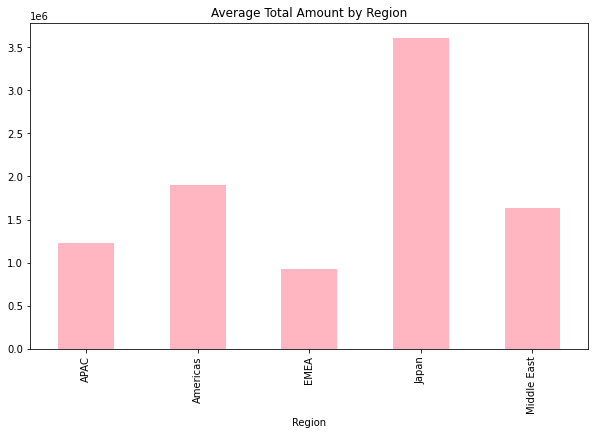

In [244]:

df.groupby("Region").mean().loc[:, "Total_Amount"]\
    .plot(kind="bar", title="Average Total Amount by Region", linewidth=2,
          figsize=(10, 6), color="lightpink")

In [245]:
df.groupby(["Region"]).\
    agg({"Total_Amount":["mean", "count"], "Price":"max"}).nlargest(5, ('Total_Amount', 'count'))

Total_Amount        Price
                     mean count    max
Region                                
Japan        3.602609e+06  4884  0.390
EMEA         9.280189e+05  4658  0.375
Americas     1.904546e+06  3916  0.560
APAC         1.230142e+06  3246  0.550
Middle East  1.629465e+06   184  0.380